## From the cleaned Flight Log compilation file
Year: ***2017***

An excel combined file of all flight logs and ops has been created with additional metadata referring to the location, time, depth and quality of XBT and AXCTD data.

Location of dropsonde events

In [32]:
import warnings
#remove the numpy/pandas/cython warnings
warnings.filterwarnings(action='ignore', message="numpy.dtype size changed,")

import pandas as pd
import os
import datetime

In [37]:
fl=pd.read_excel('/Volumes/WDC_internal/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AXBTQCandEvent_Log-all.xlsx',sheet_name='Sheet1')

### XBT and AXCTD Drop Locations

The map below has all drop locations plotted, with successful locations in black in the second plot

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean

def make_map(projection=ccrs.PlateCarree(),figsize=(16, 16)):
    fig, ax = plt.subplots(figsize=figsize,
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax, plt

Text(0.5, 1.0, 'Good Sonde Drops')

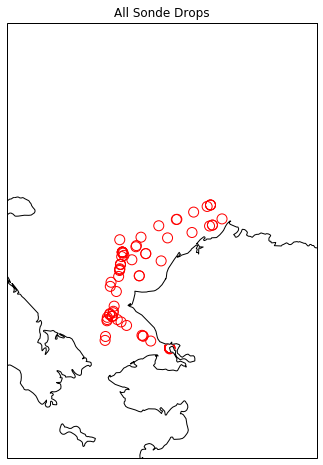

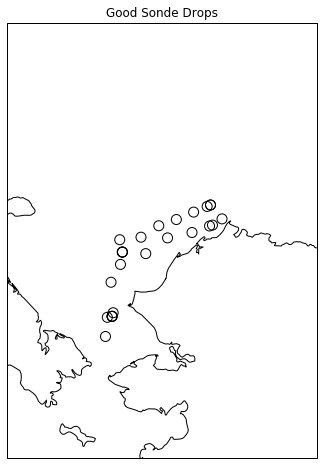

In [4]:
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

fig,ax,plt = make_map(projection=projection,figsize=(8,8))
extent = [-176, -150, 62.5, 77.5]

t = ax.scatter(fl['lon'], fl['lat'], s=100, facecolors='none', edgecolors='r', transform=transformation)

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)
plt.title('All Sonde Drops')

fig,ax,plt = make_map(projection=projection,figsize=(8,8))
extent = [-176, -150, 62.5, 77.5]

t = ax.scatter(fl['lon'][fl['DataQuality'] == 'Good'], fl['lat'][fl['DataQuality'] == 'Good'],
               s=100, facecolors='none', edgecolors='k', transform=transformation)

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)
plt.title('Good Sonde Drops')

### Each XBT Location is a geographic region of interest.

There are 5 distinct regions of interest (not counting the AXCTD line) from South to North.  Station 4 had no successful deployments and station 5 is Barrow Canyon with only a single deployment.

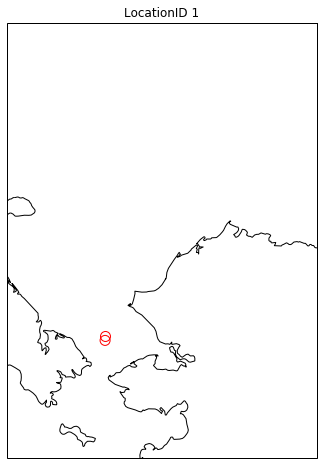

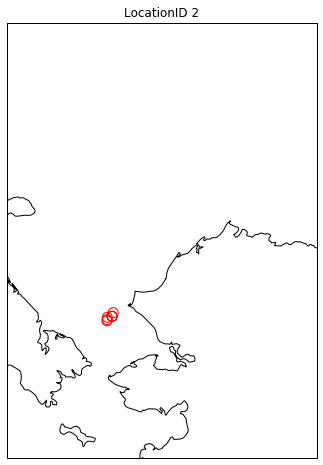

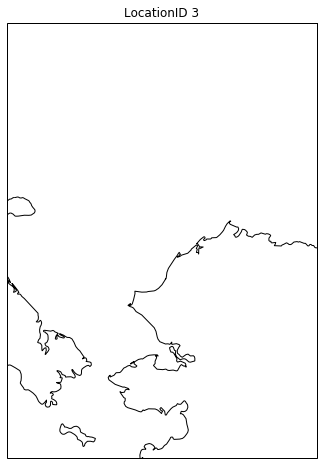

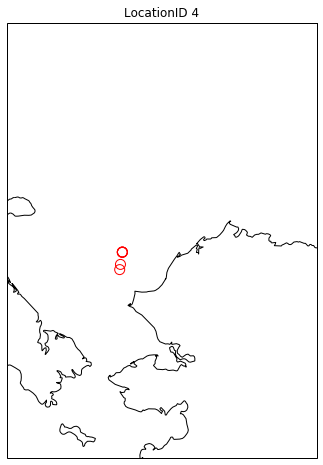

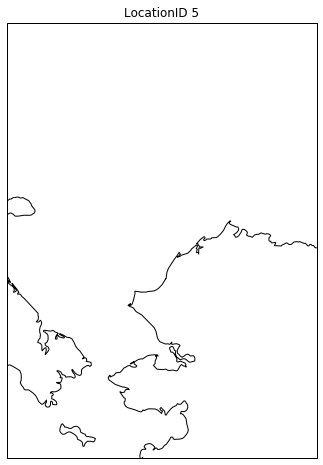

In [5]:
extent = [-176, -150, 62.5, 77.5]

for count in range(1,6):
    fig,ax,plt = make_map(projection=projection,figsize=(8,8))
    extent = [-176, -150, 62.5, 77.5]

    t = ax.scatter(fl['lon'][fl['LocationID'] == count], fl['lat'][fl['LocationID'] == count],
                   s=100, facecolors='none', color='r', transform=transformation)

    ax.add_feature(land_50m)
    ax.coastlines(resolution='50m')
    ax.set_extent(extent)
    plt.title('LocationID {}'.format(count))

### Temperature Profiles for each Region of interest

In [38]:
source_dir = '/Volumes/WDC_internal/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/'

source_file = [os.path.join(dp, f) for dp, dn,
   fn in os.walk(os.path.expanduser(source_dir)) for f in fn if 'dta' in f]
#.clean.dta for clean files

In [39]:
dfs = {}
for i,filename in enumerate(sorted(source_file)):
    try:
        header = pd.read_csv(filename,nrows=4,header=None)
        
        #parse date in header to add delta-t in columns to
        sd = header[0][1].split('= ')[-1].split('.')
        nofrag, frag = header[0][2].split('= ')[-1].split('.')
        st = datetime.datetime.strptime(sd[0] + ' ' + nofrag,'%Y/%m/%d %H:%M:%S')
        st = st.replace(microsecond=int(frag))
        
        columns = ['Time','Depth','Frequency','DegreeC','DegreeF']
        temp_data = pd.read_csv(filename,delimiter='\s+',skiprows=4,na_values='******')
        temp_data['DateTime'] = [st +datetime.timedelta(seconds=x[1]['Time']) for x in temp_data.iterrows()]
        temp_data = temp_data.set_index(pd.DatetimeIndex(temp_data['DateTime']))
        dfs.update({filename:temp_data})
        print(filename)
    except ValueError:
        print("{} failed to load".format(filename))
        continue
    except KeyError:
        columns = ['Frame#','Data','CRC','Depth','Temp','Cond','Salinity']
        temp_data = pd.read_csv(filename,delimiter='\s+',skiprows=4,na_values='*****')
        dfs.update({filename:temp_data})
        print(filename)    

/Volumes/WDC_internal/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170519/AX_ocean_profiles/log00002.clean.dta
/Volumes/WDC_internal/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170519/AX_ocean_profiles/log00002.dta
/Volumes/WDC_internal/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170519/AX_ocean_profiles/log00003.clean.dta
/Volumes/WDC_internal/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170519/AX_ocean_profiles/log00003.dta
/Volumes/WDC_internal/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170522/AX_ocean_probes/log00000.clean.dta
/Volumes/WDC_internal/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170522/AX_ocean_probes/log00000.dta
/Volumes/WDC_internal/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170522/AX_ocean_probes/log00001.clean.dta
/Volumes/WDC_internal/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170522/AX_ocean_probes/log00001.dta
/Volumes/WDC_internal/Us

No handles with labels found to put in legend.


50    AH20170916/AXBT/log00000.dta
51    AH20170916/AXBT/log00001.dta
Name: Filename_clean, dtype: object
/Volumes/WDC_internal/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170916/AXBT/log00000.dta
/Volumes/WDC_internal/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170916/AXBT/log00001.dta
6     AH20170519/AX_ocean_profiles/log00002.clean.dta
23      AH20170522/AX_ocean_probes/log00000.clean.dta
30            AH20170525/AX_ocean_probes/log00000.dta
38             AH20170529/AX_ocean_probe/log00000.dta
52                       AH20170916/AXBT/log00002.dta
53                       AH20170916/AXBT/log00003.dta
54                       AH20170916/AXBT/log00004.dta
Name: Filename_clean, dtype: object
/Volumes/WDC_internal/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170519/AX_ocean_profiles/log00002.clean.dta
/Volumes/WDC_internal/Users/bell/ecoraid/2017/Additional_FieldData/ArcticHeat/AH20170522/AX_ocean_probes/log00000.clean.dta
/Volumes/WDC_int

No handles with labels found to put in legend.


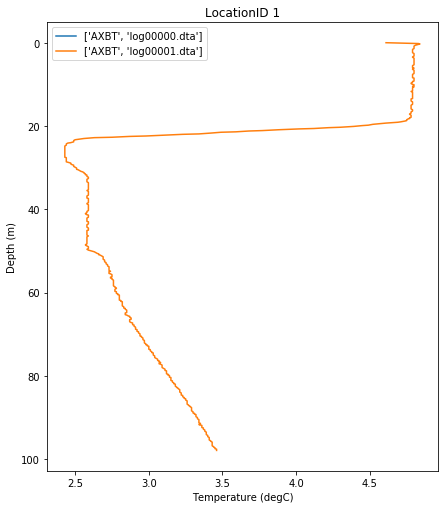

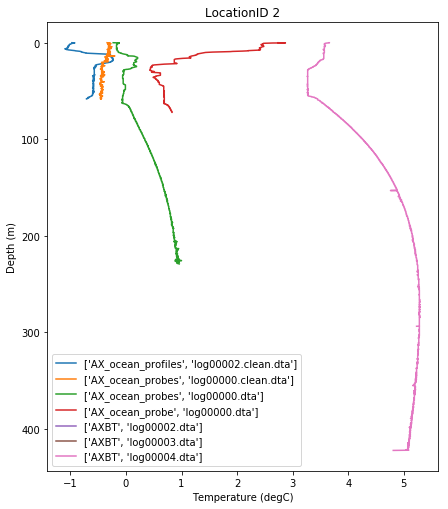

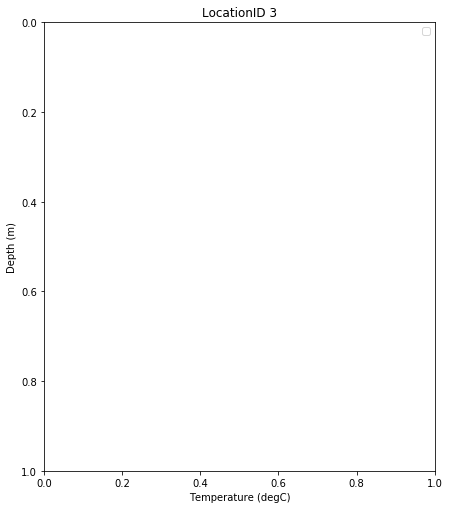

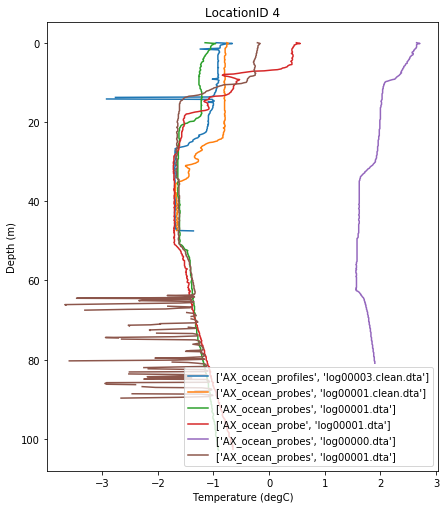

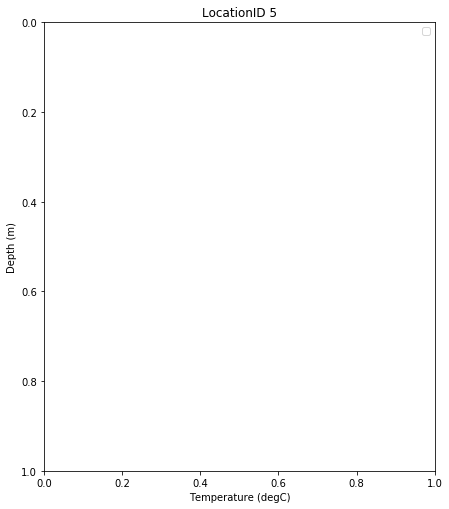

In [40]:
for count in range(1,6):
    fp = fl['Filename_clean'][fl['LocationID'] == count]
    fig, ax = plt.subplots(figsize=(7,8.25))
    print(fp)
    for i,ds in enumerate(fp):
        try:
            dfp = source_dir+ds
        except:
            continue
        df = dfs[dfp]
        print(dfp)
        try:
            ax.plot(df['(C)'],df['Depth'],label=ds.split('/')[-2:])

        except:
            pass

    plt.ylabel('Depth (m)')
    plt.xlabel('Temperature (degC)')    
    ax.invert_yaxis()
    plt.legend(loc='best')
    plt.title("LocationID {}".format(count))